# Moving Averages

$$r_t = c + \theta_1\epsilon_{t-1}+\epsilon_t$$
- $r_t$ The value of r in the current period
- $\theta_1$ A numeric coefficient for the value associated with the 1st lag
- $\epsilon_t, \epsilon_{t-1}$ Residuals for the current and past periods respectively

In [1]:
import sys
sys.path.append('..')
import utils
import statsmodels.tsa.stattools as sts
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA

df, df_test = utils.get_index_2018_market_value_splits(market_name='ftse')
df['rw'] = utils.get_random_walk_data()
df.head()

../utils.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


,market_value,wn,rw
date,,,
1994-01-07,3445.98,5123.044702,1122.139662
1994-01-10,3440.58,5459.598007,1080.347860
1994-01-11,3413.77,5407.722887,1082.095245
1994-01-12,3372.02,4735.323202,1083.639265
1994-01-13,3360.01,4382.142724,1067.146255


In [2]:
df["returns"] = df.market_value.pct_change(1).mul(100)


## ACF and PACF

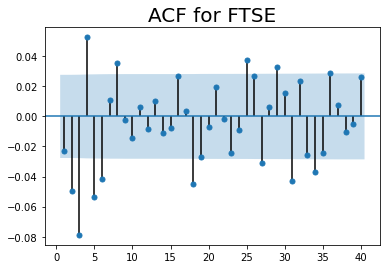

In [3]:

sgt.plot_acf(df.returns[1:], zero=False, lags=40)
plt.title("ACF for FTSE", size=20)
plt.show()

## MA(1)

In [4]:
model_ret_ma_1 = ARMA(df.returns[1:], order=(0, 1))
results_ret_ma_1 = model_ret_ma_1.fit()
results_ret_ma_1.summary()

/Users/shankar/dev/tools/anaconda3/envs/time/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 1)   Log Likelihood               -7929.595
Method:                       css-mle   S.D. of innovations              1.174
Date:                Thu, 17 Dec 2020   AIC                          15865.190
Time:                        12:17:32   BIC                          15884.754
Sample:                    01-10-1994   HQIC                         15872.045
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.162      0.245      -0.013       0.050
ma.L1.returns    -0.0257      0.015     -1.720      0.085      -0.055       0.004
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           38.8549           +0.0000j           38.8549            0.0000
-----------------------------------------------------------------------------
"""

In [5]:
import numpy as np
models = [None]
llrs = []
model_ar_x_1 = None
for i in np.arange(1, 10):
    (model_ar_x_1, llr_x) = utils.ARMA_LLR_test(df.returns[1:], model_ar_x_1, order=(0, i))
    models.append(model_ar_x_1)
    llrs.append(llr_x)
    print(f'LLR test, Lags: {i}, p-value: {llr_x}')

/Users/shankar/dev/tools/anaconda3/envs/time/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


LLR test, Lags: 1, p-value: None
LLR test, Lags: 2, p-value: 0.0
LLR test, Lags: 3, p-value: 0.0
LLR test, Lags: 4, p-value: 0.001
LLR test, Lags: 5, p-value: 0.001
LLR test, Lags: 6, p-value: 0.007
LLR test, Lags: 7, p-value: 0.554
LLR test, Lags: 8, p-value: 0.009
LLR test, Lags: 9, p-value: 0.59


In [6]:
utils.LLR_test(models[6], models[8], DF=2)

0.027

## Residuals for Returns

In [7]:
results_ret_ma_8 = models[8].fit()

df['res_ret_ma_8'] = results_ret_ma_8.resid[1:]

In [11]:
mean_8 = df.res_ret_ma_8.mean()
var_8 = df.res_ret_ma_8.var()
std_8 = df.res_ret_ma_8.std()

print(f'The mean of the residual is {round(mean_8, 3)} and \nvariance is {round(var_8, 3)} std: {round(std_8, 3)}')

The mean of the residual is -0.0 and 
variance is 1.356 std: 1.164


Gaussian White-Noise represents Normality. ie 68, 95 and 99.7 

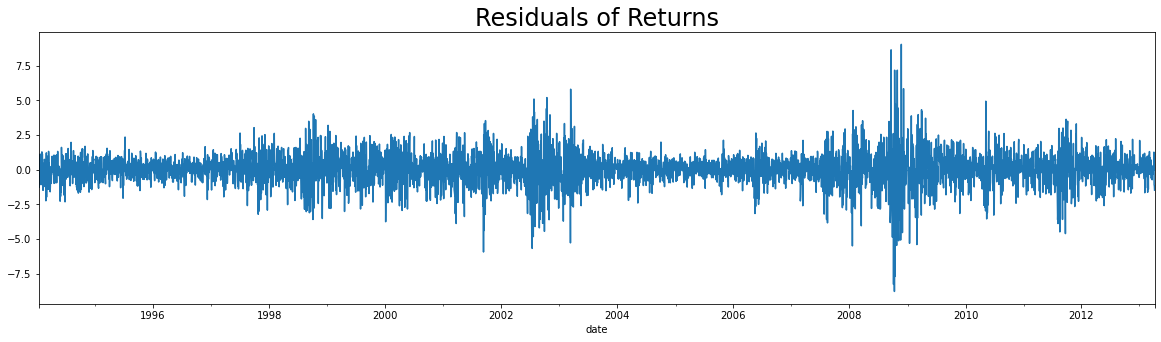

In [12]:
df.res_ret_ma_8[1:].plot(figsize=(20, 5))
plt.title("Residuals of Returns", size=24)
plt.show()

In [13]:
sts.adfuller(df.res_ret_ma_8[2:])

(-70.83581659627791,
 0.0,
 0,
 5018,
 {'1%': -3.4316538358533277,
  '5%': -2.8621161549128313,
  '10%': -2.567076687880585},
 15684.052184821803)

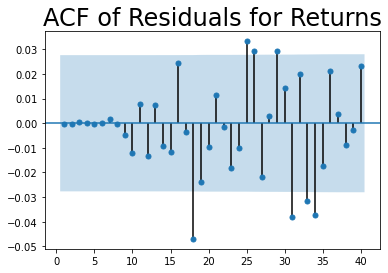

In [14]:
sgt.plot_acf(df.res_ret_ma_8[2:], zero=False, lags=40)
plt.title("ACF of Residuals for Returns", size=24)
plt.show()

## Normalized Returns

In [19]:
df = df[1:]
benchmark_returns = df.returns.iloc[1]
df['norm_returns'] = df.returns.div(benchmark_returns).mul(100)
sts.adfuller(df.norm_returns)

<ipython-input-19-dcef81bc0e45>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_returns'] = df.returns.div(benchmark_returns).mul(100)


(-12.770265719497244,
 7.798058336037938e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 64116.75100118076)

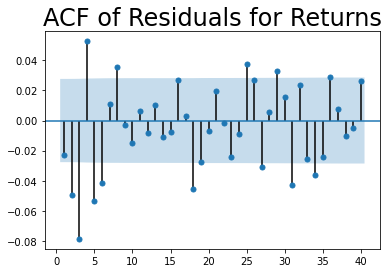

In [20]:
sgt.plot_acf(df.norm_returns[2:], zero=False, lags=40)
plt.title("ACF of Residuals for Returns", size=24)
plt.show()

In [21]:
model_norm_ret_ma_8 = ARMA(df.norm_returns[1:], order=(0, 8))
results_norm_ret_ma_8 = model_norm_ret_ma_8.fit()
results_norm_ret_ma_8.summary()

/Users/shankar/dev/tools/anaconda3/envs/time/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           norm_returns   No. Observations:                 5019
Model:                     ARMA(0, 8)   Log Likelihood              -32249.839
Method:                       css-mle   S.D. of innovations            149.397
Date:                Thu, 17 Dec 2020   AIC                          64519.678
Time:                        12:55:57   BIC                          64584.888
Sample:                    01-11-1994   HQIC                         64542.529
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.4315      1.779     -1.366      0.172      -5.919       1.056
ma.L1.norm_returns    -0.0238      0.014     -1.690      0.091      -0.051       0.004
ma.L2.norm_returns    -0.0496      0.014     -3.517      0.000      -0.077      -0.022
ma.L3.norm_returns    -0.0847      0.014     -5.993      0.000      -0.112      -0.057
ma.L4.norm_returns     0.0489      0.014      3.443      0.001       0.021       0.077
ma.L5.norm_returns    -0.0518      0.014     -3.633      0.000      -0.080      -0.024
ma.L6.norm_returns    -0.0401      0.014     -2.784      0.005      -0.068      -0.012
ma.L7.norm_returns     0.0084      0.014      0.590      0.555      -0.020       0.036
ma.L8.norm_returns     0.0365      0.014      2.625      0.009       0.009       0.064
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.4714           -0.4284j            1.5325           -0.0451
MA.2            1.4714           +0.4284j            1.5325            0.0451
MA.3            0.5944           -1.3170j            1.4449           -0.1825
MA.4            0.5944           +1.3170j            1.4449            0.1825
MA.5           -0.7320           -1.2736j            1.4690           -0.3330
MA.6           -0.7320           +1.2736j            1.4690            0.3330
MA.7           -1.4487           -0.6984j            1.6083           -0.4285
MA.8           -1.4487           +0.6984j            1.6083            0.4285
-----------------------------------------------------------------------------
"""

In [22]:
df['res_norm_ret_ma_8'] = results_ret_ma_8.resid[1:]

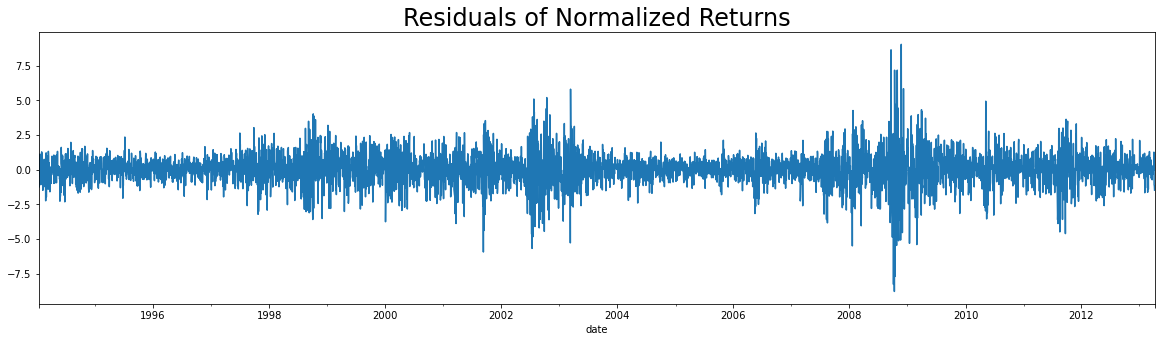

In [23]:
df.res_norm_ret_ma_8[1:].plot(figsize=(20, 5))
plt.title("Residuals of Normalized Returns", size=24)
plt.show()

## MA Models for Prices

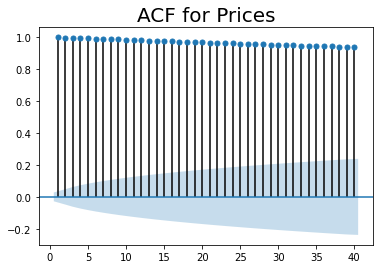

In [24]:
sgt.plot_acf(df.market_value, zero=False, lags=40)
plt.title("ACF for Prices", size=20)
plt.show()

$$x_{t-1} = c + \theta_1\epsilon_{t-2}+\epsilon_{t-1}$$
$$x_t = c + \theta_1\epsilon_{t-1}+\epsilon_t$$
$$x_t = c + \theta_1(x_{t-1} - c - \theta_1\epsilon_{t-2})+\epsilon_t$$
if $\theta_1$ is closer to 1
$$x_t = c + x_{t-1} - c - \epsilon_{t-2}+\epsilon_t$$